In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import RFECV,RFE
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data=data.drop(['dteday'],axis=1)

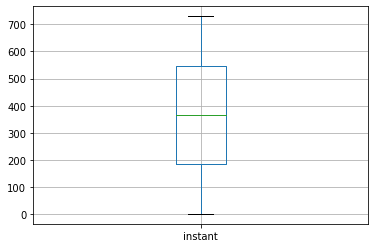

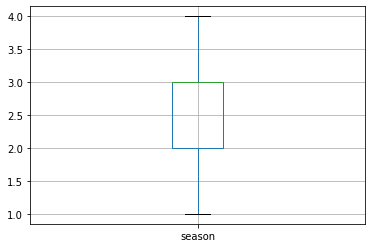

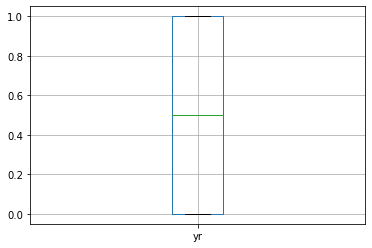

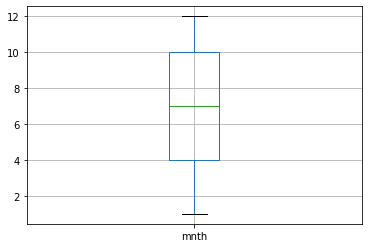

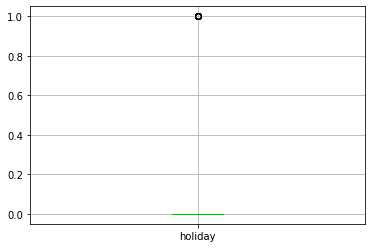

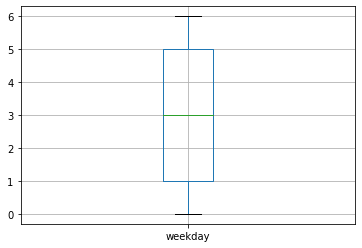

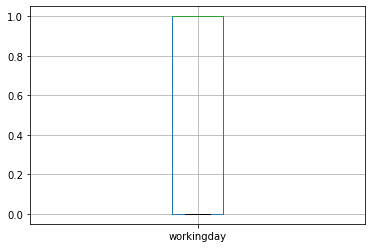

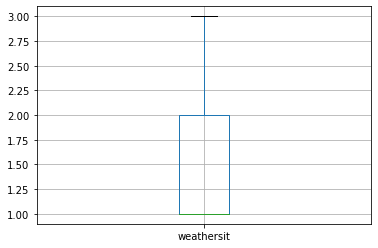

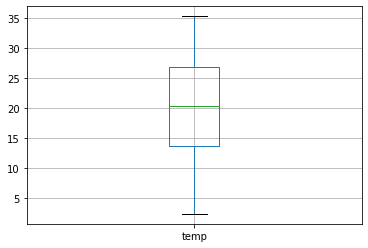

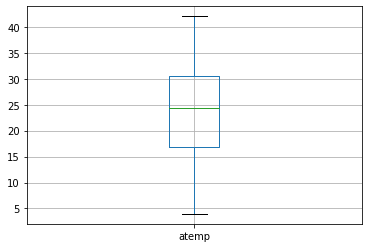

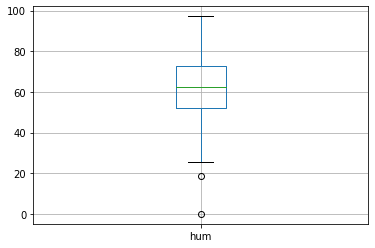

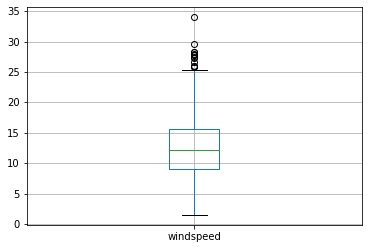

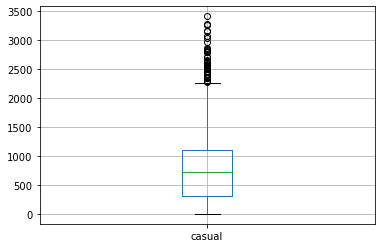

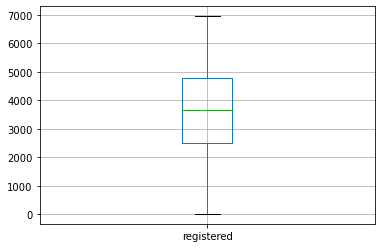

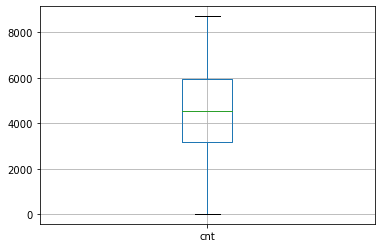

<Figure size 432x288 with 0 Axes>

In [4]:
for column in data:
    data.boxplot([column])
    plt.figure()

In [5]:
hum=data.loc[data['hum']>25]
windspeed=hum.loc[hum['windspeed']<25]
casual=windspeed.loc[windspeed['casual']<2000]
data=casual
data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


<AxesSubplot:>

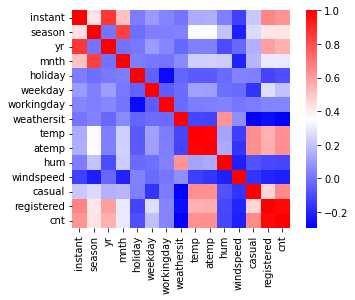

In [6]:
correlation=data.corr()
sns.heatmap(data=correlation,square=True,cmap='bwr')

In [7]:
correlation

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.423641,0.860359,0.506536,0.022220,0.095987,0.043833,0.002155,0.144138,0.146092,0.028213,-0.128328,0.213011,0.663019,0.623119
season,0.423641,1.000000,0.000438,0.834666,-0.016118,0.033742,0.025022,0.037430,0.339641,0.346760,0.200327,-0.213865,0.257960,0.416137,0.422080
yr,0.860359,0.000438,1.000000,-0.001668,0.012321,0.104267,0.048956,-0.030013,0.033772,0.032173,-0.099513,-0.027308,0.151112,0.596739,0.550702
mnth,0.506536,0.834666,-0.001668,1.000000,0.022261,0.010864,0.002733,0.055966,0.226757,0.233799,0.222282,-0.206073,0.165780,0.297270,0.296903
holiday,0.022220,-0.016118,0.012321,0.022261,1.000000,-0.043209,-0.264325,-0.040919,-0.062219,-0.066475,-0.023796,0.038202,0.033273,-0.120833,-0.095585
weekday,0.095987,0.033742,0.104267,0.010864,-0.043209,1.000000,-0.056869,-0.016749,0.113606,0.105600,-0.014542,-0.026324,-0.158113,0.269735,0.192469
workingday,0.043833,0.025022,0.048956,0.002733,-0.264325,-0.056869,1.000000,-0.022896,0.019313,0.028529,0.036303,0.004626,0.020824,0.042914,0.042086
weathersit,0.002155,0.037430,-0.030013,0.055966,-0.040919,-0.016749,-0.022896,1.000000,-0.116506,-0.118631,0.627303,0.069155,-0.285575,-0.259534,-0.294333
temp,0.144138,0.339641,0.033772,0.226757,-0.062219,0.113606,0.019313,-0.116506,1.000000,0.991388,0.124131,-0.134785,0.638249,0.553788,0.635245
atemp,0.146092,0.346760,0.032173,0.233799,-0.066475,0.105600,0.028529,-0.118631,0.991388,1.000000,0.136463,-0.161043,0.634373,0.555768,0.635981


In [8]:
lin=LinearRegression()

In [9]:
x=data.drop(['cnt'],axis=1)
y=data['cnt']
rfe=RFE(lin,n_features_to_select=3,step=1)
rfe=rfe.fit(x,y)
rfe.ranking_

array([11,  7,  1,  3,  2,  5,  6,  8,  9,  4, 12, 10,  1,  1])

In [10]:
x=data[['yr','casual','registered']]
y=data['cnt']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)
lin.fit(xtrain,ytrain)

LinearRegression()

In [11]:
pred=lin.predict(xtest)
r1=r2_score(pred,ytest)

In [12]:
def adjusted_r2(r,n,p):
    return ((r-(p/(n-1)))*((n-1)/(n-p-1)))

In [20]:
adjusted_r2(r1,647,3)

1.0

In [14]:
x=data.drop(['cnt'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
  
print(vif_data)

       feature          VIF
0      instant  2102.516416
1       season    24.236811
2           yr   782.390365
3         mnth   654.004205
4      holiday     1.169840
5      weekday     4.656602
6   workingday     3.680365
7   weathersit    15.713960
8         temp   463.495737
9        atemp   530.153188
10         hum    32.111730
11   windspeed     6.157870
12      casual     6.959629
13  registered    28.029100


In [15]:
x=data[['weekday','holiday','workingday']]
y=data['cnt']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)
lin.fit(xtrain,ytrain)

LinearRegression()

In [16]:
pred=lin.predict(xtest)
r2=r2_score(pred,ytest)

In [17]:
adjusted_r2(r2,647,3)

-15.132033216697248

In [18]:
r1,r2

(1.0, -15.05711665377141)